In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import pytrends
from requests import get

/Users/chongzhenyuen/miniforge3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


ModuleNotFoundError: No module named 'pytrends'

In [ ]:
df = pd.read_excel("../movies.xlsx")
df = df.set_index("title")

In [ ]:
from urllib.parse import quote

def get_omdb(titles):
    # Example, http://www.omdbapi.com/?i=tt3896198&apikey=833f1e37
    api_key = '833f1e37'
    titles_encoded = [ quote(t) for t in titles ]
    urls = ["http://www.omdbapi.com/?t={}&apikey={}".format(t, api_key) for t in titles_encoded]
    res = [get(url).json() for url in urls ]
    return res

titles = ['London']
# titles = df.index.tolist()
omdb_data_raw = get_omdb(titles)


In [ ]:
omdb_data_raw = get_omdb(titles)
pd.DataFrame.from_dict(omdb_data_raw)

In [ ]:
import json

with open('omdb_data.json', 'w', encoding='utf-8') as f:
    json.dump(omdb_data_raw, f, ensure_ascii=False, indent=4)

In [ ]:
"""
1. Do the longer films gross more? 
2. Is there a correlation between IMBD votes and ratings? 
3. Is there a correlation between Google searches (up to and including a year after release) and 
IMBD rating? 
4. Is there a correlation between Google searches (up to and including a year after release) and 
box office earnings
"""

In [ ]:
# Testing pytrends
# Quite some trouble, google flagging pytrends as bot, error 429

# Cookie: __utma=10102256.1490800305.1679441551.1679441753.1679441753.1; __utmb=10102256.6.9.1679442134240; __utmc=10102256; __utmz=10102256.1679441753.1.1.utmcsr=trends.google.com|utmccn=(referral)|utmcmd=referral|utmcct=/; SIDCC=AFvIBn8S4vIiLFDHdJGSDe1MN0CsUv67CFE1k7-6LutJe_SwGKvj3llsge8GGBbkMdYQsOwwoA-t; __Secure-1PSIDCC=AFvIBn9mYuFgvoIv92QNBPZL9k4amMZ3qTo3UamXYFjAfbaABm-N0supvwtU2pc7Hn0sl0EgkEI; __Secure-3PSIDCC=AFvIBn-CDzzi4Lh2BQda1bKyP44RhW2x5ZQGlTA8yLjmNrLFpG5L3vBZ30QYhXRyCDG8g3kFX5o; 1P_JAR=2023-03-21-23; NID=511=BBcS0d3lkw3lj0iQADOdba2qvf4PuA5-Yg_QVG6MFPI-_dDMGFxIatAtsrelUvvO9OwlqgtAlHcU1Btk3lsaLmZHE7IDjTIXloS-1swNOgmc3l0dFW3eBXekNluZfHOWWUv-kDpiog_v7rPcN5Aarax5wsZH2kSS0_DRE_opX5vWbi4Drlj0InuWKCibg9J2GORaNHfws3i5KgEc8cgP3mW_4xbGBG5xoTnqgGfwEIx1rEcjI_wXO1Bt8hodtD_rUrvybzjlTOxptdCoklPF3q2RXNIRSQe2fa0ZXM7reCrb8IgNvXtcFQxRW3kKMXoCckZqIOj4OE1ejfguCEpgBEh3F8GZRzbQZXGB5QoAFskcckBbbtrSuSlAvm1Zp1yCvg1f3IO00m4e-LhlR_QixxmKbEBNZGlrUIgM-xkZF1lWkw1eSBBgC4x1tZCDevWtyILjfcc70w; _ga_VWZPXDNJJB=GS1.1.1679441550.1.1.1679442137.0.0.0; _ga=GA1.3.1490800305.1679441551; _gid=GA1.3.1352519893.1679441551; OTZ=6952293_52_52_123900_48_436380; AEC=ARSKqsLi_18sXbWcEGqTy09S27Bm1sYaED0tGHl3Vll78jIzd573EjnshKY; APISID=ErK5Zp6Tvba1dONc/AB7UVvqtsUJ17nsud; HSID=ACS5uPo6_R41_AY5r; SAPISID=G4-6e-XueLvvmQyL/AA16dR0YfA__NKYxG; SID=UggFQgBm-5DZK1vFWCivczPXggpGjJ0swMzS1C0QYwoTx87oLi7taRhvh8-b3v9leQDMBA.; SSID=AQB5bhGgkStH_66DD; __Secure-1PAPISID=G4-6e-XueLvvmQyL/AA16dR0YfA__NKYxG; __Secure-1PSID=UggFQgBm-5DZK1vFWCivczPXggpGjJ0swMzS1C0QYwoTx87ohPb6JTk6ij4xQUZ-UduaCg.; __Secure-3PAPISID=G4-6e-XueLvvmQyL/AA16dR0YfA__NKYxG; __Secure-3PSID=UggFQgBm-5DZK1vFWCivczPXggpGjJ0swMzS1C0QYwoTx87ojtNnhTmL2fvHTzroV6RpAg.; SEARCH_SAMESITE=CgQI55cB; OGPC=19031496-1:19031779-1:; CONSENT=PENDING+812; SOCS=CAISHAgBEhJnd3NfMjAyMjA4MTEtMF9SQzMaAmVuIAEaBgiA64WYBg; ANID=AHWqTUntC6syHP0EaAPEEzqXA9xCScNDLDS9xmd-i-cLlzSHT6x6n2LnkvG5STTi
# Accept: application/json, text/plain, */*
# Accept-Encoding: gzip, deflate, br
# Host: trends.google.com
# User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.3 Safari/605.1.15
# Accept-Language: en-GB,en;q=0.9
# Referer: https://trends.google.com/trends/explore?date=all&q=The%20Age%20of%20Adaline&hl=en-GB
# Connection: keep-alive


# After inspection, cookies are important. So in automated solution, we have to populate cookies.

from pytrends.request import TrendReq

requests_args = {
    'headers': {
        'Cookie': '__utma=10102256.1490800305.1679441551.1679441753.1679441753.1; __utmb=10102256.6.9.1679442134240; __utmc=10102256; __utmz=10102256.1679441753.1.1.utmcsr=trends.google.com|utmccn=(referral)|utmcmd=referral|utmcct=/; SIDCC=AFvIBn8S4vIiLFDHdJGSDe1MN0CsUv67CFE1k7-6LutJe_SwGKvj3llsge8GGBbkMdYQsOwwoA-t; __Secure-1PSIDCC=AFvIBn9mYuFgvoIv92QNBPZL9k4amMZ3qTo3UamXYFjAfbaABm-N0supvwtU2pc7Hn0sl0EgkEI; __Secure-3PSIDCC=AFvIBn-CDzzi4Lh2BQda1bKyP44RhW2x5ZQGlTA8yLjmNrLFpG5L3vBZ30QYhXRyCDG8g3kFX5o; 1P_JAR=2023-03-21-23; NID=511=BBcS0d3lkw3lj0iQADOdba2qvf4PuA5-Yg_QVG6MFPI-_dDMGFxIatAtsrelUvvO9OwlqgtAlHcU1Btk3lsaLmZHE7IDjTIXloS-1swNOgmc3l0dFW3eBXekNluZfHOWWUv-kDpiog_v7rPcN5Aarax5wsZH2kSS0_DRE_opX5vWbi4Drlj0InuWKCibg9J2GORaNHfws3i5KgEc8cgP3mW_4xbGBG5xoTnqgGfwEIx1rEcjI_wXO1Bt8hodtD_rUrvybzjlTOxptdCoklPF3q2RXNIRSQe2fa0ZXM7reCrb8IgNvXtcFQxRW3kKMXoCckZqIOj4OE1ejfguCEpgBEh3F8GZRzbQZXGB5QoAFskcckBbbtrSuSlAvm1Zp1yCvg1f3IO00m4e-LhlR_QixxmKbEBNZGlrUIgM-xkZF1lWkw1eSBBgC4x1tZCDevWtyILjfcc70w; _ga_VWZPXDNJJB=GS1.1.1679441550.1.1.1679442137.0.0.0; _ga=GA1.3.1490800305.1679441551; _gid=GA1.3.1352519893.1679441551; OTZ=6952293_52_52_123900_48_436380; AEC=ARSKqsLi_18sXbWcEGqTy09S27Bm1sYaED0tGHl3Vll78jIzd573EjnshKY; APISID=ErK5Zp6Tvba1dONc/AB7UVvqtsUJ17nsud; HSID=ACS5uPo6_R41_AY5r; SAPISID=G4-6e-XueLvvmQyL/AA16dR0YfA__NKYxG; SID=UggFQgBm-5DZK1vFWCivczPXggpGjJ0swMzS1C0QYwoTx87oLi7taRhvh8-b3v9leQDMBA.; SSID=AQB5bhGgkStH_66DD; __Secure-1PAPISID=G4-6e-XueLvvmQyL/AA16dR0YfA__NKYxG; __Secure-1PSID=UggFQgBm-5DZK1vFWCivczPXggpGjJ0swMzS1C0QYwoTx87ohPb6JTk6ij4xQUZ-UduaCg.; __Secure-3PAPISID=G4-6e-XueLvvmQyL/AA16dR0YfA__NKYxG; __Secure-3PSID=UggFQgBm-5DZK1vFWCivczPXggpGjJ0swMzS1C0QYwoTx87ojtNnhTmL2fvHTzroV6RpAg.; SEARCH_SAMESITE=CgQI55cB; OGPC=19031496-1:19031779-1:; CONSENT=PENDING+812; SOCS=CAISHAgBEhJnd3NfMjAyMjA4MTEtMF9SQzMaAmVuIAEaBgiA64WYBg; ANID=AHWqTUntC6syHP0EaAPEEzqXA9xCScNDLDS9xmd-i-cLlzSHT6x6n2LnkvG5STTi',
        'Accept': 'application/json, text/plain, */*',
        'Accept-Encoding': 'gzip, deflate, br',
        'Host': 'trends.google.com',
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.3 Safari/605.1.15',
        'Accept-Language': 'en-GB,en;q=0.9',
        'Referer': 'https://trends.google.com/trends/explore?date=all&q=The%20Age%20of%20Adaline&hl=en-GB',
        'Connection': 'keep-alive'
    }
}



pytrend = TrendReq(requests_args=requests_args)

pytrend.build_payload(kw_list=['The age of adaline'])
# Interest by Region
df = pytrend.interest_by_region()
df.head(10)

In [ ]:
# 1. Do the longer films gross more? 


import json

with open('omdb_data.json', 'r') as f:
     data = json.load(f)



In [ ]:
df = pd.read_json('omdb_data.json')
df = df.set_index("Title")
df.head()


In [ ]:
df["Ratings"]

In [ ]:
# Flatten ratings
rating_agencies = set()

for index, row in df['Ratings'].items():
    for r in row:
        rating_agencies.add(r["Source"])

rating_agencies

In [ ]:
def flatten_ratings(row):
    x = {s["Source"]: s["Value"] for s in row['Ratings']}
    if 'Internet Movie Database' in x:
        row['Internet Movie Database'] = float(x['Internet Movie Database'].split("/")[0]) / 10
    else:
        row['Internet Movie Database'] = np.NaN
    
    if 'Rotten Tomatoes' in x:
        row['Rotten Tomatoes'] = float(x['Rotten Tomatoes'][:-1]) / 100
    else:
        row['Rotten Tomatoes'] = np.NaN
                                      
    if 'Metacritic' in x:
        row['Metacritic'] = float(x['Metacritic'].split("/")[0]) / 100
    else:
        row['Metacritic'] = np.NaN
    
    return row

df = df.apply(flatten_ratings, axis = 1)


In [ ]:
df.head()

In [ ]:
# Fix other numerical data
print(df.columns)

df['Runtime'] = df['Runtime'].apply(lambda x: int(x.split()[0]) if x != "N/A" else np.NaN)
df['imdbVotes'] = df['imdbVotes'].apply(lambda x: int( x.replace(",", "")) if x != "N/A" else np.NaN)
df['BoxOffice'] = df['BoxOffice'].apply(lambda x: int( x.replace(",", "")[1:]) if x != "N/A" else np.NaN)

In [ ]:
df.head()

In [ ]:
# Clean data
print(len(df))
nan_counts = df.isna().sum()
nan_counts

In [ ]:
# Object types are N/A, pandas cannot flag them as null 

count = [(df[col] == 'N/A').sum() for col in df.columns]
na_rows = [(df[col] == 'N/A').index for col in df.columns]
print([pair for pair in zip(df.columns, count)])



In [ ]:
# Extract numerical and categorical features

df_num = df.select_dtypes(include=['int', 'float'])
df_date = df[["Year", "Released", "DVD"]]
df_cat = df.select_dtypes(include=['int', 'float'])
print(df_num.columns)


In [ ]:
# Get numerical features and plot correlation matrix


%matplotlib inline

# calculate the correlation matrix
corr = df_num.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
# Correlation between runtime and boxoffice is low, try mutual information

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

X = df_num.copy()
X = X.dropna()
X

In [ ]:
y = X.pop("BoxOffice")
mi_scores = make_mi_scores(X, y)


In [ ]:
import matplotlib.pyplot as plt
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [ ]:
sns.relplot(x="imdbVotes", y="BoxOffice", data=df);

In [ ]:
sns.relplot(x="imdbRating", y="BoxOffice", data=df);

In [1]:
sns.lmplot(x="Runtime", y="BoxOffice", data=df);

NameError: name 'sns' is not defined

                             Year   Runtime  imdbRating  imdbVotes  BoxOffice  \
Year                     1.000000 -0.009035   -0.300585  -0.187888  -0.087838   
Runtime                 -0.009035  1.000000    0.262314   0.315073   0.047923   
imdbRating              -0.300585  0.262314    1.000000   0.548013   0.256251   
imdbVotes               -0.187888  0.315073    0.548013   1.000000   0.550566   
BoxOffice               -0.087838  0.047923    0.256251   0.550566   1.000000   
Internet Movie Database -0.300585  0.262314    1.000000   0.548013   0.256251   
Rotten Tomatoes         -0.163560  0.194633    0.739783   0.312540   0.095370   
Metacritic              -0.249102  0.258102    0.784951   0.412566   0.156426   

                         Internet Movie Database  Rotten Tomatoes  Metacritic  
Year                                   -0.300585        -0.163560   -0.249102  
Runtime                                 0.262314         0.194633    0.258102  
imdbRating                    

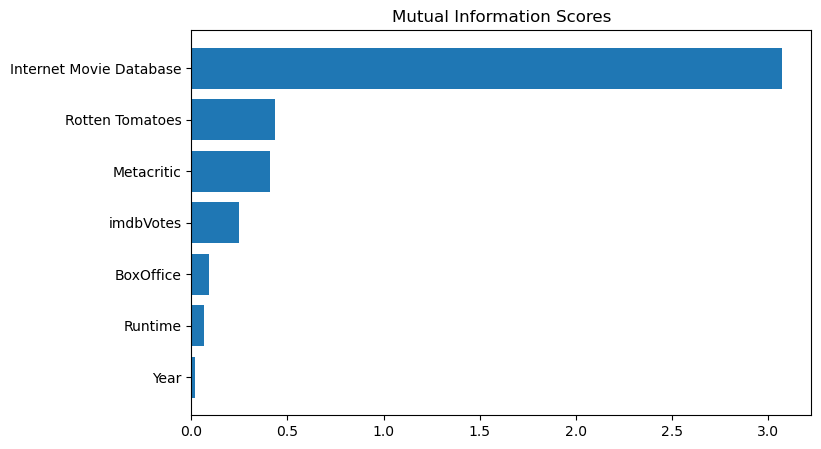

In [232]:
print(df_num.corr())
X = df_num.copy()
X = X.dropna()
y = X.pop("imdbRating")
mi_scores = make_mi_scores(X, y)

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

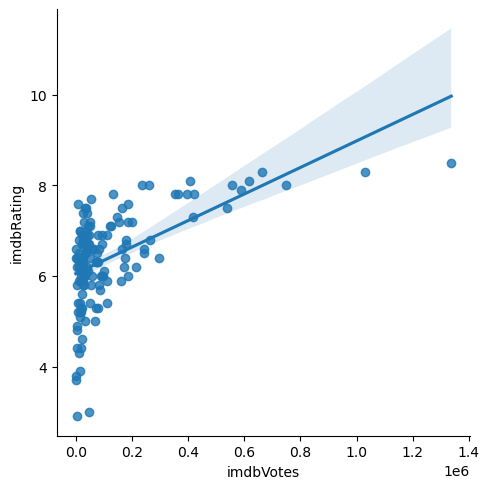

In [233]:
sns.lmplot(x="imdbVotes", y="imdbRating", data=df);

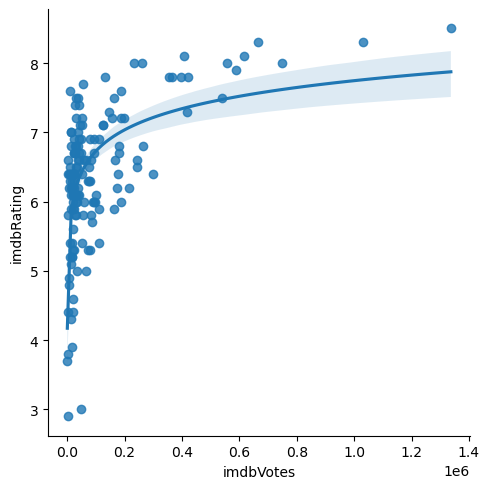

In [234]:
# Add log transformation of imdb ratings and imdb votes

sns.lmplot(x="imdbVotes", y="imdbRating", data=df, logx=True);

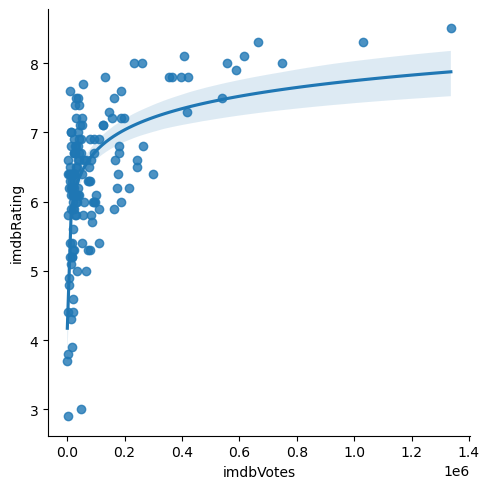

In [247]:
df['log_imdbVotes'] = df['imdbVotes'].apply(lambda x: np.log(x))
df['log_imdbRating'] = df['imdbRating'].apply(lambda x: np.log(x))

sns.lmplot(x="imdbVotes", y="imdbRating", data=df, logx=True);

In [19]:
from datetime import datetime
from dateutil.relativedelta import relativedelta


def get_date_one_year(date_string):
    date_obj = datetime.strptime(date_string, '%d %b %Y')
    new_date_obj = date_obj + relativedelta(years=1)
    new_date_string = new_date_obj.strftime('%Y-%m-%d')

    return "{} {}".format(date_obj.strftime('%Y-%m-%d'), new_date_obj.strftime('%Y-%m-%d'))

timeframe = [get_date_one_year(released_date) for released_date in df["Released"]]
print(len(timeframe))
print(len(titles))

KeyError: 'Released'

In [18]:
from time import sleep
import random
import logging
from pytrends.exceptions import ResponseError
from pytrends.request import TrendReq

requests_args = {
    'headers': {
        'Cookie': '__utma=10102256.1490800305.1679441551.1679844599.1679844599.1; __utmb=10102256.1.10.1679844599; __utmc=10102256; __utmt=1; __utmz=10102256.1679844599.1.1.utmcsr=trends.google.com|utmccn=(referral)|utmcmd=referral|utmcct=/; SIDCC=AFvIBn9PqdX8yVhby0crqaNaWkKUNMg0PrqOtrMZT2lOSSuOYEok0cMUaMV85EHJI7cm47Eb6me0; __Secure-1PSIDCC=AFvIBn-odAedvXQTm_ZDKvNy3_SQbYsecjPJYWG3nH8xAoN6pR13IL4GZ7AqdnR0-X-COio9dIA; __Secure-3PSIDCC=AFvIBn8HYJUZF23FaY8ec_0_Xetas3D4CM4GUh14x61w3yDZEbSctBwN-oeXlIGXwdx6ajiUYw0; _ga_VWZPXDNJJB=GS1.1.1679844591.4.1.1679844599.0.0.0; _ga=GA1.3.1490800305.1679441551; _gid=GA1.3.353626381.1679844591; _gat_gtag_UA_4401283=1; NID=511=UfIoCTDXb6eau8gAC5Abk8lQ33gDGLkHb3MoBnopf1VK_ReHZ9xK69O2LL0qTs9hUfI1_Jhe_jAgXmdwcdv5tW8q4s6rN5PBNrpZGBgU9bIAvE3PfjlnPWSFt_MV35zX2IxxrlK4R-57vmhL5n0oJJKrP2be6XDgjEC50iXwjPpAjL66Dq-4TnWdMyoPfpb2sbLRle5Wn-dYe_8SkAczTF-Quv7fC-c6CATyH-x2jJfdCbnjkF_AmRBWa5KBDIXFC04JepkSWWusQPECbvjlErHDCXk8e2qSUBpNmGlzAPg9MMQlJLSQ3CPJ03QKM1OvRIqKB-lKZ_MQqb3i1wRslvG8iQ2U8_n_P_ZT5dQ1QIMrapYZwEv-H-2UmRae_g96qk4yrWsArE-mqnoQ9fpYY5TOoJDyfRL-PYeX-I0oiF4I6wWfAfXfB5Aob9BAoBWMPevpnFhMbQ; 1P_JAR=2023-3-26-14; AEC=AUEFqZd8mLhQBGS0fhetYNWeF2paE0jSO3V3yygv8lmQ2Bv081GFl0p85as; APISID=_7EJ-a5syz9zJgEU/AAT5Peub6PlkFkO5E; HSID=APaE7HbeXzljG9lfq; SAPISID=vWm--1fOhBOhKj1Y/AHX6EI69vaZFY39c4; SID=UggFQiXde0ut5rzblEwpNezi6Pl1se0M1QgafLtQw_SYfEHd1C-AAXa8S8RHuvp9W4y7Vw.; SSID=AIe3EdCRUnqT0ETZI; __Secure-1PAPISID=vWm--1fOhBOhKj1Y/AHX6EI69vaZFY39c4; __Secure-1PSID=UggFQiXde0ut5rzblEwpNezi6Pl1se0M1QgafLtQw_SYfEHdEXbXvug4To1QZZxuiOwwqw.; __Secure-3PAPISID=vWm--1fOhBOhKj1Y/AHX6EI69vaZFY39c4; __Secure-3PSID=UggFQiXde0ut5rzblEwpNezi6Pl1se0M1QgafLtQw_SYfEHdP7A18IAyN6mLGaE9sABhAg.; SEARCH_SAMESITE=CgQI7pcB; OTZ=6952293_52_52_123900_48_436380; OGPC=19031496-1:19031779-1:; CONSENT=PENDING+812; SOCS=CAISHAgBEhJnd3NfMjAyMjA4MTEtMF9SQzMaAmVuIAEaBgiA64WYBg; ANID=AHWqTUntC6syHP0EaAPEEzqXA9xCScNDLDS9xmd-i-cLlzSHT6x6n2LnkvG5STTi',
        'Accept': 'application/json, text/plain, */*, text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
        'Accept-Encoding': 'gzip, deflate, br',
        'Host': 'trends.google.com',
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.3 Safari/605.1.15',
        'Accept-Language': 'en-GB,en;q=0.9',
        'Referer': 'https://trends.google.com/trends/explore?date=all&q=The%20Age%20of%20Adaline&hl=en-GB',
        'Connection': 'keep-alive'
    }
}

title = ['London']

pytrend = TrendReq(requests_args=requests_args)
df_trends = dict()
def get_google_trend(title, timeframe):
    for t, tf in zip(title, timeframe):
        print(t, tf)
        pytrend.build_payload(kw_list=[t], timeframe=tf)
        try:
            df_trends[t] = pytrend.interest_over_time()
        except ResponseError as e:
            print("Error:", e)
            df_trends[t] = None
            # Invalid request, usually caused by released date being earlier than 2004
            
        sleep(10 + random.randint(1, 5)) # Time out to ensure google does not flag

get_google_trend(title, timeframe)


NameError: name 'timeframe' is not defined

In [341]:
from copy import deepcopy

df_trends_c = deepcopy(df_trends)

for k, v in df_trends_c.items():
    if v is not None:
        df_trends_c[k] = v.rename(columns={k:"searches"})
    else:
        ...
#         df_trends_c[k] = pd.DataFrame.from_dict({"searches": [None], "isPartial": [None]})

    
df_multi = pd.concat(df_trends_c, axis=0)


In [350]:
# Save df_trends to file
import json

df_multi.to_json("./trends_data.json", orient='table')
trends_data = pd.read_json("./trends_data.json", orient='table')

trends_data

searches  isPartial
                   date                           
The Age of Adaline 2015-04-26       100      False
                   2015-05-03        86      False
                   2015-05-10        79      False
                   2015-05-17        80      False
                   2015-05-24        88      False
...                                 ...        ...
What the Health    2018-09-02        77      False
                   2018-09-09        80      False
                   2018-09-16        90      False
                   2018-09-23        80      False
                   2018-09-30        83      False

[5439 rows x 2 columns]

In [353]:
df_average = trends_data.groupby(level=0).mean()
df_average

,searches,isPartial
A Hidden Life,24.811321,0.0
A Quiet Place,11.865385,0.0
Alpha,77.884615,0.0
Anthropoid,32.115385,0.0
Ashby,64.830189,0.0
...,...,...
Unknown,47.769231,0.0
Welcome to Marwen,5.961538,0.0
What the Health,78.326923,0.0
Where the Truth Lies,43.076923,0.0


In [366]:
df_copy = df.copy()

df_copy.merge(df_average, how='left', left_index=True, right_index=True)

,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,...,Production,Website,Response,Internet Movie Database,Rotten Tomatoes,Metacritic,log_imdbVotes,log_imdbRating,searches,isPartial
Title,,,,,,,,,,,,,,,,,,,,,
The Age of Adaline,2015,PG-13,24 Apr 2015,112,"Drama, Fantasy, Romance",Lee Toland Krieger,"J. Mills Goodloe, Salvador Paskowitz","Blake Lively, Michiel Huisman, Harrison Ford","A young woman, born at the turn of the 20th ce...","English, Portuguese, Italian",...,N/A,N/A,True,0.72,0.55,0.51,12.135489,1.974081,24.641509,0.0
Black Christmas,1974,R,20 Dec 1974,98,"Horror, Mystery, Thriller",Bob Clark,Roy Moore,"Olivia Hussey, Keir Dullea, Margot Kidder","During their Christmas break, a group of soror...",English,...,N/A,N/A,True,0.71,0.71,0.65,10.686613,1.960095,NaN,NaN
London,2005,R,03 Jul 2021,92,"Drama, Romance",Hunter Richards,Hunter Richards,"Jessica Biel, Chris Evans, Jason Statham",London is a drug laden adventure that centers ...,English,...,N/A,N/A,True,0.64,0.14,0.24,10.081215,1.856298,89.000000,0.0
Twisted,2004,R,27 Feb 2004,97,"Crime, Drama, Mystery",Philip Kaufman,Sarah Thorp,"Ashley Judd, Samuel L. Jackson, Andy Garcia","Jessica, whose father killed her mother and co...","English, Italian, Spanish",...,"Summit Entertainment, Paramount Pictures",N/A,True,0.53,0.02,0.26,10.018378,1.667707,81.886792,0.0
Friends with Kids,2011,R,16 Mar 2012,107,"Comedy, Drama, Romance",Jennifer Westfeldt,Jennifer Westfeldt,"Jennifer Westfeldt, Adam Scott, Maya Rudolph",Two best friends decide to have a child togeth...,English,...,Roadside Attractions,N/A,True,0.61,0.67,0.55,10.661251,1.808289,25.576923,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
National Treasure: Book of Secrets,2007,PG,21 Dec 2007,124,"Action, Adventure, Mystery",Jon Turteltaub,"Marianne Wibberley, Cormac Wibberley, Gregory ...","Nicolas Cage, Diane Kruger, Justin Bartha",Benjamin Gates must follow a clue left in John...,"English, French",...,N/A,N/A,True,0.65,0.36,0.48,12.400014,1.871802,8.396226,0.0
I Am Mother,2019,TV-14,07 Jun 2019,113,"Drama, Mystery, Sci-Fi",Grant Sputore,"Michael Lloyd Green, Grant Sputore","Luke Hawker, Rose Byrne, Maddie Lenton","In the wake of humanity's extinction, a teenag...",English,...,N/A,N/A,True,0.67,0.89,0.64,11.445439,1.902108,8.320755,0.0
Awake,2007,R,30 Nov 2007,84,"Crime, Drama, Mystery",Joby Harold,Joby Harold,"Hayden Christensen, Jessica Alba, Terrence Howard",A wealthy young man undergoing heart transplan...,"English, Japanese",...,Weinstein Co.,N/A,True,0.65,0.23,0.33,11.251405,1.871802,45.811321,0.0


In [ ]:
# Format datetime and check any possible trends with dates
df["Year"] = pd.to_datetime(df["Year"])
df["Released"] = pd.to_datetime(df["Released"])
df["DVD"] = pd.to_datetime(df["DVD"])

